In [ ]:
import pandas_datareader as pdr

In [ ]:
key = '8138a60a6bcc7cdfa486834b128d5ce3c3a3e417'

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)


/usr/local/lib/python3.8/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2018-01-02 00:00:00+00:00  172.26  172.30  169.26  170.16  25048048   
       2018-01-03 00:00:00+00:00  172.23  174.55  171.96  172.53  28819653   
       2018-01-04 00:00:00+00:00  173.03  173.47  172.08  172.54  22211345   
       2018-01-05 00:00:00+00:00  175.00  175.37  173.05  173.44  23016177   
       2018-01-08 00:00:00+00:00  174.35  175.61  173.93  174.35  20134092   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2018-01-02 00:00:00+00:00  40.896905  40.906402  40.184664  40.398336   
       2018-01-03 00:00:00+00:00  40.889783  41.440583  40.825681  40.961007   
       2018-01-04 00:00:00+00:00  41.079714  41.184176  40.854171  40.963381   
       2018-01-05 00:00:00+00:00  41.547419  41.635262  41.084462  41.177054   
       2018-01-08 00:00:00+00:00  41.393100  41.692242  41.293386  41.393100   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2018-01-02 00:00:00+00:00  100192192      0.0          1.0  
       2018-01-03 00:00:00+00:00  115278612      0.0          1.0  
       2018-01-04 00:00:00+00:00   88845380      0.0          1.0  
       2018-01-05 00:00:00+00:00   92064708      0.0          1.0  
       2018-01-08 00:00:00+00:00   80536368      0.0          1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1258 entries, ('AAPL', Timestamp('2018-01-02 00:00:00+0000', tz='UTC')) to ('AAPL', Timestamp('2022-12-29 00:00:00+0000', tz='UTC'))
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        1258 non-null   float64
 1   high         1258 non-null   float64
 2   low          1258 non-null   float64
 3   open         1258 non-null   float64
 4   volume       1258 non-null   int64  
 5   adjClose     1258 non-null   float64
 6   adjHigh      1258 non-null   float64
 7   adjLow       1258 non-null   float64
 8   adjOpen      1258 non-null   float64
 9   adjVolume    1258 non-null   int64  
 10  divCash      1258 non-null   float64
 11  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 164.0+ KB


In [ ]:
df1 = df.reset_index() ['close']

In [ ]:
df1.shape

(1258,)

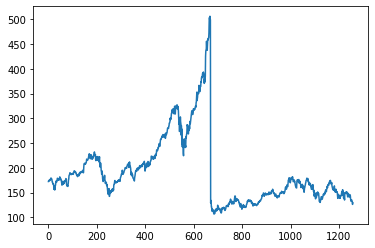

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1258, 1)

In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
import numpy
#converting the array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step):
    a = dataset[i:(i+time_step), 0]  # 1,2,3 ... 100 where y will get 101 value
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape[1])

100


In [ ]:
len(test_data)

441

In [ ]:
print(X_test.shape, "", y_test.shape)

(341, 100)  (341,)


In [ ]:
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf


In [ ]:
def build_LSTM_model():
    input = tf.keras.layers.Input(
        shape=(X_train.shape[1], 1), name ="input"
    )
    x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True))(input)
       
    x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences=False, dropout=0.5))(x)
    
    x = tf.keras.layers.Dense(25 , activation="softmax")(x)
    
    output = tf.keras.layers.Dense(1)(x)
               
    model = tf.keras.Model(inputs=input, outputs=output, name="BI_LSTM")
    
    return model

model = build_LSTM_model()
model.summary()

Model: "BI_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 100, 1)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         133120    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 300,723
Trainable params: 300,723
Non-trainab

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 165ms/step - loss: 0.0659 - accuracy: 0.0014 - val_loss: 0.0467 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0365 - accuracy: 0.0014 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0224 - accuracy: 0.0014 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0126 - accuracy: 0.0014 - val_loss: 8.3571e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0095 - accuracy: 0.0014 - val_loss: 3.1030e-04 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0082 - accuracy: 0.0028 - val_loss: 5.4498e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0074 - accuracy: 0.0028 - val_loss

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 11ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

232.65724336065736

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

154.71793132887055

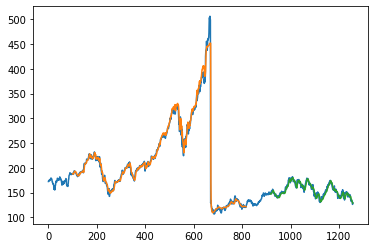

In [ ]:
#Plotting
#shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
#shift test predict for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df1), :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps = 100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input,verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

print(lst_output)

0 day input [0.14547276 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585
 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002
 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008
 0.12265498 0.11944897 0.12303068 0.11927364 0.1265623  0.14174076
 0.11772073 0.12140263 0.11403882 0.10985598 0.11932373 0.1253851
 0.11742016 0.11496556 0.10917971 0.11003131 0.11251096 0.10770194
 0.08926738 0.07854728 0.08919224 0.09833438 0.09908579 0.09665623
 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477 0.07899812
 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487 0.10672511
 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838 0.10973075
 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338 0.07020664
 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201 0.10990607
 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882 0.09362555
 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187 0.0903444
 0.08541014 0.08969317 0.08846587 0.09430182 0.09675

In [ ]:
day_new = np.arange(1,100)
day_pred = np.arange(100,130)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

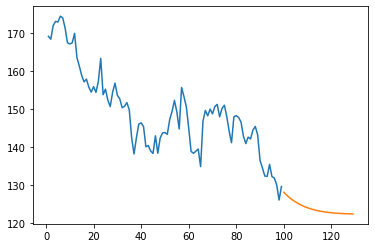

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))